In [1]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (64, 25)

Populating the interactive namespace from numpy and matplotlib


This script create a (.png) heightmap image. 
--------------------------------------------
The image created contains 2 componants: the first is circular wave-like paterns and 
the second is a mask taken from an input image. The mask is put as a flat region at a chosen height.

Input part waves: 
  - largeur:  Size of the image in pixel
  - longeur:  Size of the image in pixel
  - s: list of position of the center of the circular waves (x,y) in pixel
  - a: list of the amplitude of the wave (can be negative)   
  - lamb: list of wavelength of the waves (in pixel) 
    
Input part mask:
  - image_name: name of the png image encoding the mask. 
    The mask must be in black over white bottom in this (.png) image. 
    The size of the mask in pixel is the same as in this image.
  - cx: center of the mask in pixel  
  - cy: center of the mask in pixel  
  - mask_height: height of the mask (in [0,1])  
    
Output:
   - output_name: name of the output .png image

In [2]:
longeur=640
largeur=250

s=[(55,70),(585,195),(420,30)]
a=[-0.5,0.5,-0.2] 
lamb=[50,40,30]

image_name = "foot_190.png"
cx = 320
cy = 125
mask_height = 0.5

output_name='test.png'

---------------------------------------------------------------------------------------------

In [3]:
def envlop(x,d):
    if x<d:
        return 0.5
    else:
        return d/(d+x)

In [4]:
X = np.ones((largeur,longeur)) # sample 2D array
for x in range(longeur):
    for y in range(largeur):
        for i in range(len(s)):
            d=((x-s[i][0])**2+(y-s[i][1])**2)**0.5
            X[y,x]+=a[i]*np.cos(2*3.141596*d/lamb[i])*envlop(d,0.9*lamb[i])
        

In [5]:
X=X-np.min(X)

In [6]:
X=X/np.max(X)

In [7]:
cx = 320
cy = 125

In [8]:
from PIL import Image
img = Image.open("foot_190.png")
mask=np.asarray(img)



In [9]:
for x in range(mask.shape[0]):
    for y in range(mask.shape[1]):
        val=mask[mask.shape[1]-1-y,x,0]
        if val==0:
            X[int(y+cy-mask.shape[0]/2),int(x+cx-mask.shape[0]/2)]=mask_height

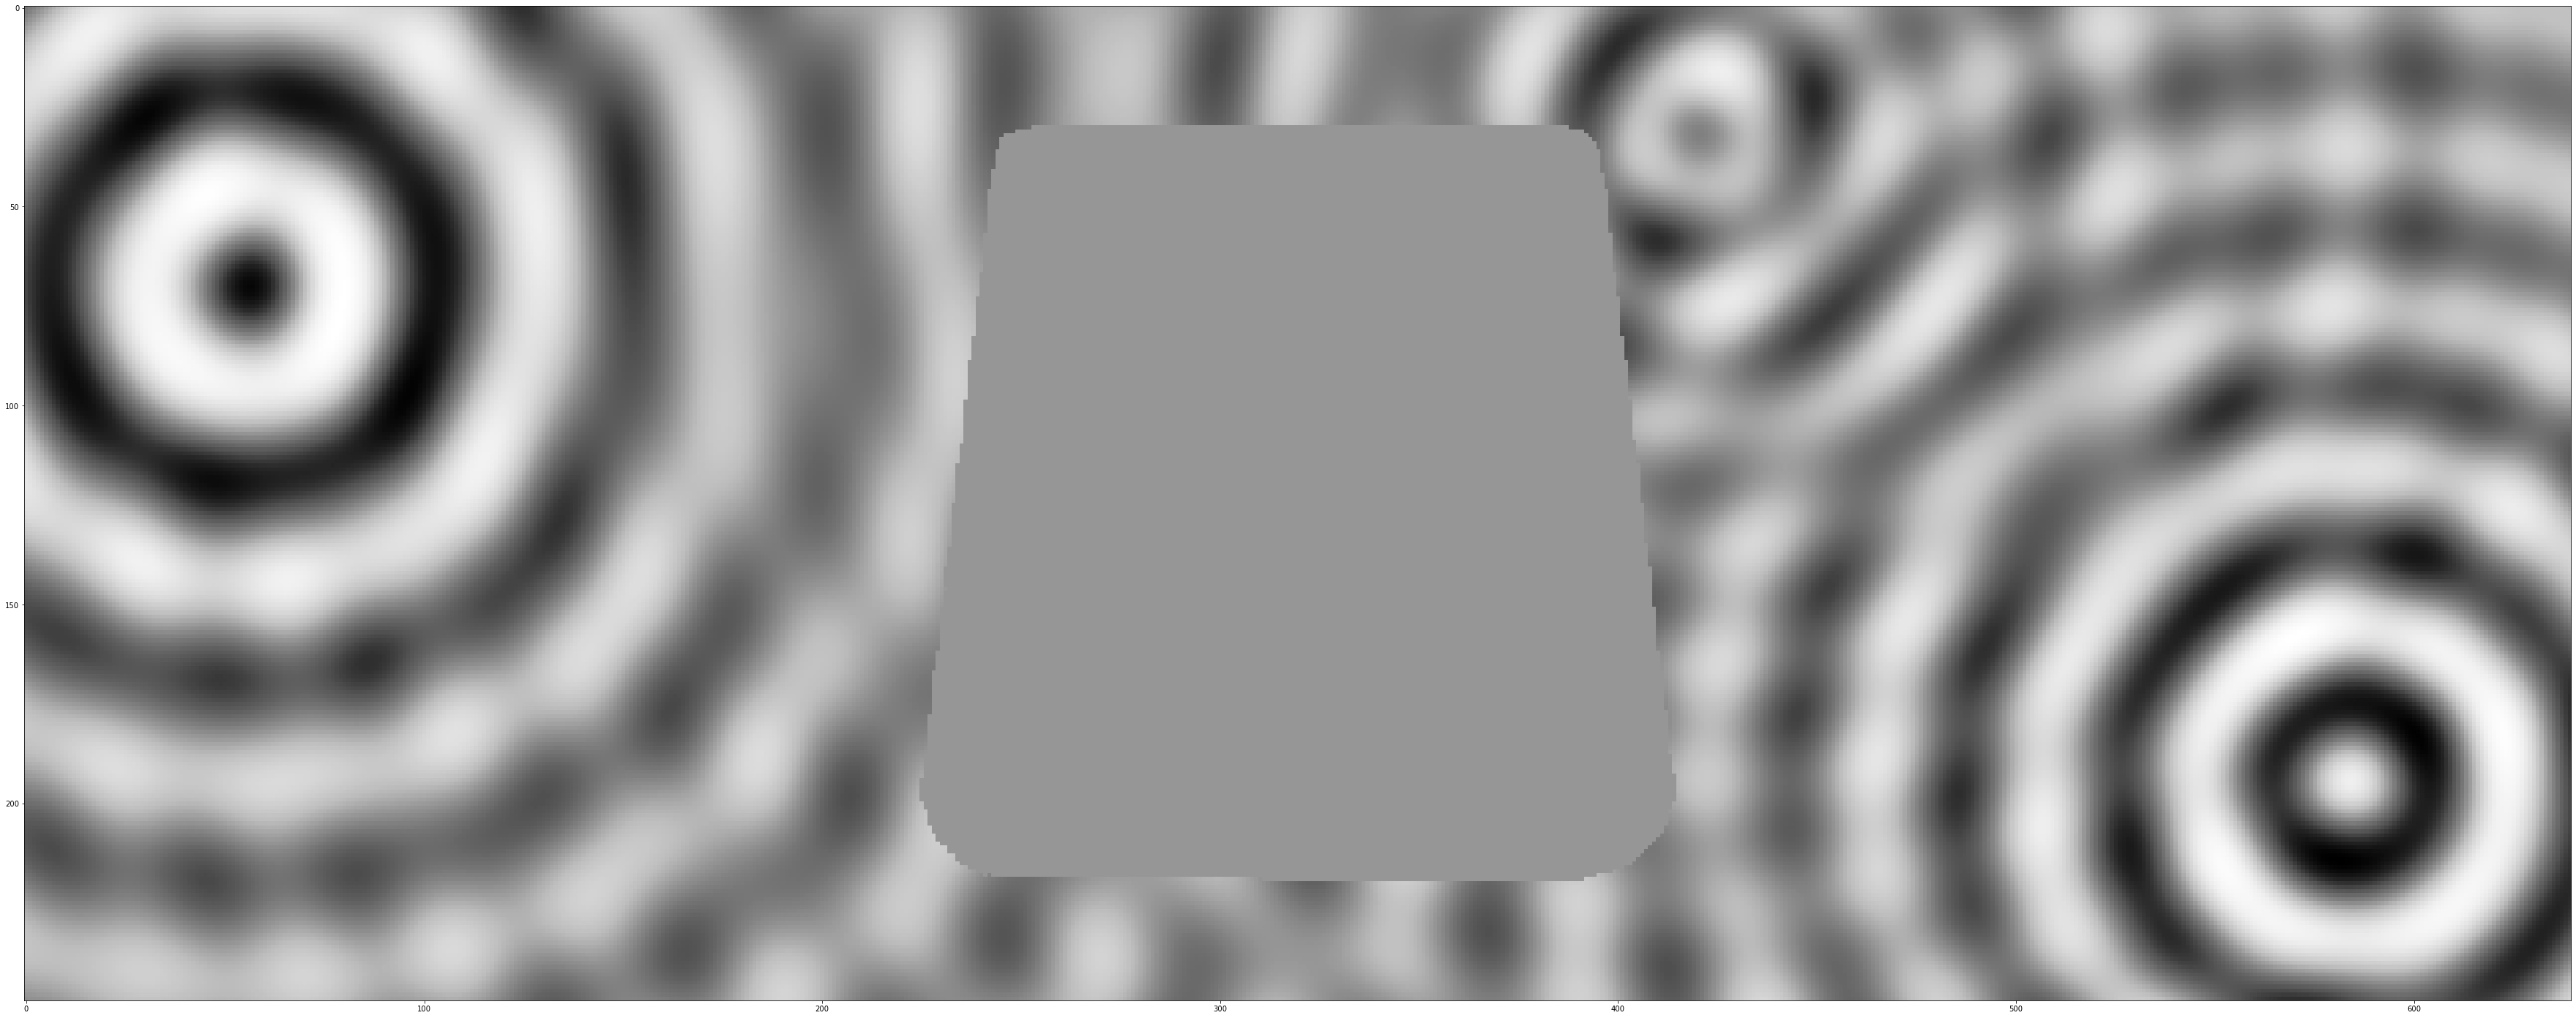

In [10]:

pylab.rcParams['figure.figsize'] = (64, 25)
plt.imshow(X, cmap="Greys_r")
plt.show()

In [11]:
cmap = plt.cm.Greys_r
norm = plt.Normalize(vmin=X.min(), vmax=X.max())
image = cmap(norm(X))

# save the image
plt.imsave(output_name, image)